In [1]:
from sklearn.datasets import fetch_covtype
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
import scipy.sparse 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Adding the below line to remove unnecessary warnings from the notebook.
import warnings
warnings.filterwarnings('ignore')

X, y = fetch_covtype(return_X_y=True)

print('Max value in the target column: ', np.bincount(y).argmax())

target = y

for x, val in enumerate(y):
    if val == 2:
        target[x] = 1
    else:
        target[x] = 0
        
# print(target[:, 1])

# I accidently assumed that we will be using test data as well but since we arent, I just switched the train size to 0.99 so I am using almost all the data.
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size=0.99, random_state=8)

Max value in the target column:  2


## Q 1

In [2]:
min_max = MinMaxScaler()

X_train_minmax = min_max.fit_transform(X_train)
X_test_minmax = min_max.fit_transform(X_test)

logit = LogisticRegression(solver='saga')

# Without scaling
logit_score_noscale = cross_val_score(logit, X_train, y_train, cv=3, scoring='roc_auc')

# Min max scaling
logit_score_minmax = cross_val_score(logit, X_train_minmax, y_train, cv=3, scoring='roc_auc')


In [3]:
print("Roc Auc score for logistic regression without scaling: ", logit_score_noscale.mean())
print("Roc Auc score for logistic regression with min max scaling: ", logit_score_minmax.mean())

Roc Auc score for logistic regression without scaling:  0.6655023957296226
Roc Auc score for logistic regression with min max scaling:  0.8272255856749279


In [4]:
dTree = DecisionTreeClassifier()

# Without scaling
dTree_score_noscale = cross_val_score(dTree, X_train, y_train, cv=3, scoring='roc_auc')

# With min max scaling
dTree_score_minmax = cross_val_score(dTree, X_train_minmax, y_train, cv=3, scoring='roc_auc')


In [34]:
print("Roc Auc score for decision tree without scaling: ", dTree_score_noscale.mean())
print("Roc Auc score for decision tree with min max scaling: ", dTree_score_minmax.mean())

Roc Auc score for decision tree without scaling:  0.9459344897168993
Roc Auc score for decision tree with min max scaling:  0.945902590891491


In [33]:
print("Conclusion")
print("")
print("Decision trees overall are invariant to scaling primarily for the reason is the way trees work inherently. Trees for boundaries around data points segregating them into different subsets/classes, this points to the idea that as long as we transform all the data the same way(eg. apply log to all the data points etc.) their distances or relative positions on the graph/plane remain the same. Hence, they arent affected by scaling at all.")


Conclusion

Decision trees overall are invariant to scaling primarily for the reason is the way trees work inherently. Trees for boundaries around data points segregating them into different subsets/classes, this points to the idea that as long as we transform all the data the same way(eg. apply log to all the data points etc.) their distances or relative positions on the graph/plane remain the same. Hence, they arent affected by scaling at all.


## Q2

#### A

In [7]:
def getGRP(dims):
    return GaussianRandomProjection(n_components=dims)

def getStandardScaler():
    return StandardScaler()

# Train dataset
std_scaler = getStandardScaler()
df_s_train = std_scaler.fit_transform(X_train)
grp = getGRP(15)
X_train_grp = grp.fit_transform(df_s_train)

# Test dataset
df_s_test = std_scaler.fit_transform(X_test)
X_test_grp = grp.fit_transform(df_s_test)

logit = LogisticRegression(solver='saga')

logit_score_a = cross_val_score(logit, X_train_grp, y_train, cv=3, scoring='roc_auc')

In [8]:
print("A) Score: ", logit_score_a.mean())

A) Score:  0.654990285876931


#### B

In [9]:
df_s_train = std_scaler.fit_transform(X_train)
grp = getGRP(40)
X_train_grp = grp.fit_transform(df_s_train)

# Test dataset
df_s_test = std_scaler.fit_transform(X_test)
X_test_grp = grp.fit_transform(df_s_test)

logit = LogisticRegression(solver='saga')

logit_score_b = cross_val_score(logit, X_train_grp, y_train, cv=3, scoring='roc_auc')

# clf_logit = logit.fit(X_train_grp, y_train)
# print(roc_auc_score(y_test, clf_logit.predict(X_test_grp)))

In [10]:
print("B) Score: ", logit_score_b.mean())

B) Score:  0.8203214994270521


#### C

In [11]:
pca = PCA()
pca.n_components = 10

# Scaling then PCA
df_s_train = std_scaler.fit_transform(X_train)
X_train_pca = pca.fit_transform(df_s_train)
# pca_data_with_scikit.shape

logit = LogisticRegression(solver='saga')

logit_score_c = cross_val_score(logit, X_train_pca, y_train, cv=3, scoring='roc_auc')

In [12]:
print("C) Score: ", logit_score_c.mean())

C) Score:  0.7187835321993252


#### D

In [13]:
# PCA then Scaling
X_train_pca = pca.fit_transform(X_train)
df_s_train = std_scaler.fit_transform(X_train_pca)

logit = LogisticRegression(solver='saga')

logit_score_d = cross_val_score(logit, df_s_train, y_train, cv=3, scoring='roc_auc')


In [ ]:
print("D) Score: ", logit_score_d.mean())

D) Score:  0.6614305210470639


#### Q2) 1

In [32]:
print("Performance of B is better than both A and C, wherein C is marginally better than A. Gaussian projection are really effective when it comes to reducing dimensions with comporatively lesser use of computational power as is the case with A and B, but the tradeoff here is that with lower dimensions we get a more distorted data as compared to higher dimensions, hence the difference in dimensions explains performance difference between A and B. Further, when you compare PCA(used in C) to random projections unlike GRP, we get the most accurate/representative reduction from the original data, hence for similar dimensions PCA outperforms random projections, but the caveat here is its much more computationally intensive and for very high dimensions painfully slow.")


Performance of B is better than both A and C, wherein C is marginally better than A. Gaussian projection are really effective when it comes to reducing dimensions with comporatively lesser use of computational power as is the case with A and B, but the tradeoff here is that with lower dimensions we get a more distorted data as compared to higher dimensions, hence the difference in dimensions explains performance difference between A and B. Further, when you compare PCA(used in C) to random projections unlike GRP, we get the most accurate/representative reduction from the original data, hence for similar dimensions PCA outperforms random projections, but the caveat here is its much more computationally intensive and for very high dimensions painfully slow.


#### Q2) 2

In [31]:
print("PCA tends to get biased around values with high variance, so suppose one variable/feature has a higher variance, pca would move more in that direction affecting the cluster forming process. With normalisation, features even with lesser variances are amplified a bit and that helps in making the clusters more accurate and resemble different features. Hence, C performs better than D in the above scenario.")


PCA tends to get biased around values with high variance, so suppose one variable/feature has a higher variance, pca would move more in that direction affecting the cluster forming process. With normalisation, features even with lesser variances are amplified a bit and that helps in making the clusters more accurate and resemble different features. Hence, C performs better than D in the above scenario.


#### Q2) 3

In [16]:
# Plot
# KNEE METHOD PLOT
logit = LogisticRegression(solver='saga')

roc_auc_plot = []

std_scaler = getStandardScaler()
df_s_train = std_scaler.fit_transform(X_train)

for i in range(1, 21):
    pcluster = PCA()
    pcluster.n_components = i
    X_train_pca = pcluster.fit_transform(df_s_train)
    logit_score = cross_val_score(logit, X_train_pca, y_train, cv=3, scoring='roc_auc')
    roc_auc_plot.append(logit_score.mean())
    print("ROC AUC score for dimension: ", i)
    print(logit_score.mean())

dimension = [y for y in range(1, 21)]
# print("Conclusion:",)

ROC AUC score for dimension:  1
0.5612438482607048
ROC AUC score for dimension:  2
0.557230182504931
ROC AUC score for dimension:  3
0.556047945122944
ROC AUC score for dimension:  4
0.5572600903545307
ROC AUC score for dimension:  5
0.7117973616796768
ROC AUC score for dimension:  6
0.712939585183903
ROC AUC score for dimension:  7
0.71074505344206
ROC AUC score for dimension:  8
0.7286417618491144
ROC AUC score for dimension:  9
0.704997744932308
ROC AUC score for dimension:  10
0.7191406972988451
ROC AUC score for dimension:  11
0.739488092883812
ROC AUC score for dimension:  12
0.7098393577161843
ROC AUC score for dimension:  13
0.7249633554615665
ROC AUC score for dimension:  14
0.7461659165609934
ROC AUC score for dimension:  15
0.7458396448194788
ROC AUC score for dimension:  16
0.751153796349208
ROC AUC score for dimension:  17
0.7561438807486806
ROC AUC score for dimension:  18
0.7469970783977518
ROC AUC score for dimension:  19
0.7469827602645088
ROC AUC score for dimension: 

Conclusion:


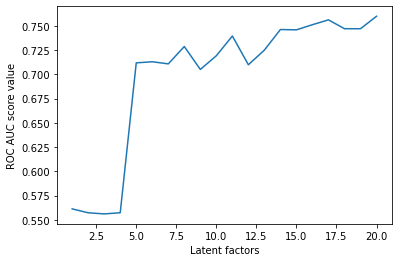

From the graph we see the knee point occuring at about 4-6 range, where we see a sudden rise in scores. So 5 is the minimum inherent latent factor/dimension for this task.


In [17]:
print("Conclusion:")
plt.plot(dimension, roc_auc_plot)
plt.xlabel("Latent factors")
plt.ylabel("ROC AUC score value")
plt.show()

print('From the graph we see the knee point occuring at about 4-6 range, where we see a sudden rise in scores. So 5 is the minimum inherent latent factor/dimension for this task.')


## Q3

In [18]:
df_business = pd.read_json('./yelp_dataset/yelp_academic_dataset_business.json', lines=True)
df_academic = pd.read_json('./yelp_dataset/yelp_academic_dataset_tip.json', lines=True)

bus_id = {}

# Key value is bussiness_id and value is whether business is restaurant or not.
def buildBusinessIdMap():
    for idx, val in enumerate(df_FL_business['business_id']):
        bus_id[val] = df_FL_business.iloc[idx, 14]
        
def checkPresence(x):
    if x in bus_id:
        return int(1) if bus_id[x] == True else int(0)
    return None

# Filter out FL from all the states, create a mask
FL_state_mask = df_business['state'].str.contains('FL', case=False, na=False) 
# Create a new df with the mask
df_FL_business = df_business[FL_state_mask]
# For all the businesses in FL create a new 'is_restaurant' to be used later for classification
df_FL_business['is_restaurant'] = df_FL_business['categories'].str.contains('restaurant', case=False, na=False)
# Remove null values from columns including categories and is_restaurant
df_FL_business = df_FL_business.dropna()

# Create a map for all businessids in FL and with value if they are a restuarant or not. 
# {'bussiness_id': 'is_restaurant value' ...}
buildBusinessIdMap()

# Create a new column for is_restaurant in academic dataset
df_academic['is_restaurant'] = df_academic['business_id']

# Check if the bussiness_id exists in the map, this ensures its in FL and whether its a restaurant or not.
# Basically joining the two tables.
df_academic['is_restaurant'] = df_academic['business_id'].apply(checkPresence)

# Drop null values (i.e other state data and empty categories etc.)
df_academic = df_academic.dropna()

# Final academic dataset with businesses in FL with text reviews and is_reestaurant classification column.
print("Unique target values from is_restaurant column", df_academic.is_restaurant.unique())
print("Total unique target values from is_restaurant column\n", df_academic.is_restaurant.value_counts())

tfidf_vector = TfidfVectorizer()
tf_vec = tfidf_vector.fit_transform(df_academic['text'])
logit = LogisticRegression(solver='saga')

logit_score = cross_val_score(logit, tf_vec, df_academic['is_restaurant'], cv=3, scoring='roc_auc')
print('\nMean cross validation roc_auc score for the tf-idf vector: ', logit_score.mean())

Unique target values from is_restaurant column [1. 0.]
Total unique target values from is_restaurant column
 1.0    107208
0.0     34440
Name: is_restaurant, dtype: int64

Mean cross validation roc_auc score for the tf-idf vector:  0.8990139982695399


## Q4

### Q4a

In [19]:
# Desktop/DSP 396/HW4/ml-latest-small/ratings.csv

df = pd.read_csv('./ml-latest-small/ratings.csv')

X = df[['userId', 'movieId']].values
y = df['rating'].values

def ConvertToDense(m, n, dims):  # from R=(X,y), in sparse format 
    dim_tup = (dims[0] + 1, dims[1] + 1)
    matrix_sparse = scipy.sparse.csr_matrix((n, (m[:,0], m[:,1])), shape = dim_tup)  # sparse matrix in compressed format (CSR)
    dense_mat = matrix_sparse.todense()            
    dense_mat = np.asarray(dense_mat[1:,1:])             
    return dense_mat

# n_users = len(df['userId'].unique())
# n_items = len(df['movieId'].unique())

n = df.movieId.max() + 1
d = df.userId.max() + 1

R_shape = (d, n)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

movie_sparse_matrix_train = ConvertToDense(X_train, y_train, R_shape)
movie_sparse_matrix_test = ConvertToDense(X_test, y_test, R_shape)

print(movie_sparse_matrix_train.shape)
print(movie_sparse_matrix_test.shape)

(611, 193610)
(611, 193610)


In [20]:
# Step 2
dims = 50

clf = NMF(n_components=dims, max_iter=500)

W1 = clf.fit_transform(movie_sparse_matrix_train)
H1 = clf.components_

print(W1.shape)
print(H1.shape)

def predictions(P, Q):
    return P.dot(Q)

pred = predictions(np.asarray(W1), np.asarray(H1))
print(pred.shape)

print("Predicted rating for user 1 to movie 2: ", pred[0][1])

(611, 50)
(50, 193610)
(611, 193610)
Predicted rating for user 1 to movie 2:  1.0295452284605304


In [21]:
# Step 3
allMovie1Pred = []

for i in range(0, d):
    if movie_sparse_matrix_train[i][0] == 0.0: # Only pick users who have not watched movie 1
        allMovie1Pred.append((pred[i][0], i, 0))
allMovie1Pred.sort(reverse=True)

In [22]:
print("Recommended users:",)
print('Top 3 users most likely to watch movie 1:')
print('User:', allMovie1Pred[0][1]+1)
print('User:', allMovie1Pred[1][1]+1)
print('User:', allMovie1Pred[2][1]+1)
print()
print('Their respective hypothetical ratings are:', allMovie1Pred[0][0], allMovie1Pred[1][0], allMovie1Pred[2][0])

pred

Recommended users:
Top 3 users most likely to watch movie 1:
User: 6
User: 84
User: 357

Their respective hypothetical ratings are: 3.7860948762352953 3.6633262547418424 3.462049326466042


array([[2.15381121e+00, 1.02954523e+00, 3.28013519e-01, ...,
        0.00000000e+00, 1.28528616e-04, 0.00000000e+00],
       [1.83053965e-01, 1.26181120e-01, 0.00000000e+00, ...,
        0.00000000e+00, 5.38377249e-03, 0.00000000e+00],
       [7.97080570e-02, 5.01382338e-02, 3.58209262e-02, ...,
        0.00000000e+00, 3.73616556e-07, 0.00000000e+00],
       ...,
       [3.83995224e-01, 4.87602374e-01, 9.02543007e-02, ...,
        0.00000000e+00, 2.52466517e-04, 0.00000000e+00],
       [5.04463317e+00, 4.23795333e-03, 7.97229429e-04, ...,
        0.00000000e+00, 8.48910401e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### Q4b

In [23]:
# Compute RMSE

# print(movie_sparse_matrix_train.shape)
# print(movie_sparse_matrix_test.shape)

def get_rmse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return np.sqrt(mean_squared_error(pred, actual))

pred[pred > 5] = 5
pred[pred < 0] = 0

In [24]:
print("RMSE on training:", get_rmse(pred, movie_sparse_matrix_train))
print("RMSE on testing:", get_rmse(pred, movie_sparse_matrix_test))

RMSE on training: 2.2771997730498215
RMSE on testing: 3.19048016714383


In [26]:
#plot
train_error_plot = []
test_error_plot = []
for dim in range(1, 21):
    clf = NMF(n_components=dim, max_iter=500, init='nndsvda')

    W1 = clf.fit_transform(movie_sparse_matrix_train)
    H1 = clf.components_
    
    print('Number of latent factors: ', W1.shape[1])

    pred = predictions(np.asarray(W1), np.asarray(H1))
    train_error = get_rmse(pred, movie_sparse_matrix_train)
    test_error = get_rmse(pred, movie_sparse_matrix_test)
    print('Training error ', train_error)
    print('Testing error ', test_error)
    print()
    train_error_plot.append(train_error)
    test_error_plot.append(test_error)


Number of latent factors:  1
Training error  3.1138570942170767
Testing error  3.149919268932568

Number of latent factors:  2
Training error  3.018737091817685
Testing error  3.0724122363869384

Number of latent factors:  3
Training error  2.95415223573195
Testing error  3.021503627360626

Number of latent factors:  4
Training error  2.915174891831902
Testing error  3.0127102450907053

Number of latent factors:  5
Training error  2.8857243714128593
Testing error  3.018084012237402

Number of latent factors:  6
Training error  2.8519516617081613
Testing error  3.007734371892277

Number of latent factors:  7
Training error  2.817100598275851
Testing error  2.9927498820567786

Number of latent factors:  8
Training error  2.794291493783025
Testing error  2.9976716701557837

Number of latent factors:  9
Training error  2.7665775889621145
Testing error  2.9911326851587825

Number of latent factors:  10
Training error  2.747743126977692
Testing error  2.997018276803743

Number of latent fact

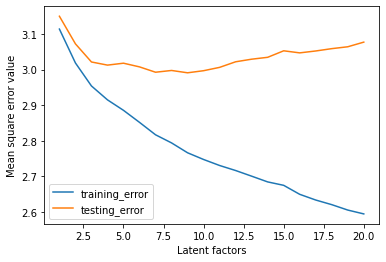

Conclusion:
There is a sharp decrease in the testing error rate from 1-3 range but we see a valley forming around 6-10 range, since calculating factors here isnt too expensive, Id pick any value between 7 to 9, ideally 9. The values in the range form a local minima, any value above 20 seems like diminishing returns, so my choice would be 9. Our training error decreases but our testing error rate plateaus so I consider test error as the main criteria.


In [35]:
dimension = [y for y in range(1, 21)]

plt.plot(dimension, train_error_plot, label="training_error")
plt.plot(dimension, test_error_plot, label="testing_error")
plt.legend()
plt.xlabel("Latent factors")
plt.ylabel("Mean square error value")
plt.show()

print("Conclusion:")
print('There is a sharp decrease in the testing error rate from 1-3 range but we see a valley forming around 6-10 range, since calculating factors here isnt too expensive, Id pick any value between 7 to 9, ideally 9. The values in the range form a local minima, any value above 20 seems like diminishing returns, so my choice would be 9. Our training error decreases but our testing error rate plateaus so I consider test error as the main criteria.')
      

### Q4c

In [30]:
print("Suggestions: \n")
print('There are multiple directions we could explore here but two of my prefered ways would be:\n')
print('1) Grid search: With grid search we can try multiple different latent factors and combinations of other arguments provided by NMF library implementation(eg. solver, solver etc.) to get the best values of latent factors.')
print('2) Normalisation of data: With reduced variance in data our data wouldnt be biased in towards certain ratings and our predictions would be more accurate. Our NMF would benifit performance wise from this as well.')


Suggestions: 

There are multiple directions we could explore here but two of my prefered ways would be:

1) Grid search: With grid search we can try multiple different latent factors and combinations of other arguments provided by NMF library implementation(eg. solver, solver etc.) to get the best values of latent factors.
2) Normalisation of data: With reduced variance in data our data wouldnt be biased in towards certain ratings and our predictions would be more accurate. Our NMF would benifit performance wise from this as well.
